In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [7]:
train = pd.read_csv('train_7.csv')
test= pd.read_csv('test_7.csv')

#범주형 데이터 분석 경진대회

In [3]:
#대칭시켜서 모든 행보기
#이진형데이터,명목형데이터,순서형데이터,날짜데이터로 분류
train.head().T

,0,1,2,3,4
id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada


In [4]:
#결측값 X
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

In [5]:
train.drop(axis=1,columns=['id'],inplace=True)

In [6]:
train['ord_0']=train['ord_0'].astype('object')

In [7]:
#int 형태의자료형만 나옴
train.describe()

,bin_0,bin_1,bin_2,day,month,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000
mean,0.127503,0.256607,0.383223,3.007817,5.771113,0.30588
std,0.333537,0.436761,0.486173,1.817949,3.843519,0.46078
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,0.000000,0.000000,0.000000,2.000000,2.000000,0.00000
50%,0.000000,0.000000,0.000000,3.000000,4.000000,0.00000
75%,0.000000,1.000000,1.000000,4.000000,9.000000,1.00000
max,1.000000,1.000000,1.000000,7.000000,12.000000,1.00000


In [8]:
obj_col = [col for col in train.columns if train[col].dtype in ['object'] ]

In [9]:
#범주형 자료만의 통계량을 볼수있음
train[obj_col].describe()

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,2,3,6,6,6,4,222,522,1220,2215,11981,3,5,6,15,26,192
top,T,Y,Green,Trapezoid,Lion,Russia,Oboe,f7821e391,d173ac7ca,3a114adea,c720f85ca,163cc60fa,1,Novice,Freezing,g,L,od
freq,153535,191633,127341,101181,101295,101123,92293,2801,1218,534,299,72,194846,126583,99816,36405,19066,5019


In [10]:
bin_col = ['bin_0','bin_1','bin_2','bin_3','bin_4']
nom_col = ['nom_0','nom_1','nom_2','nom_3','nom_4','nom_5','nom_6','nom_7','nom_8','nom_9']
ord_col=['ord_0','ord_1','ord_2','ord_3','ord_4']
date_col=['day','month','target']

In [11]:
#비율표시 해주는 함수코드
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력 
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

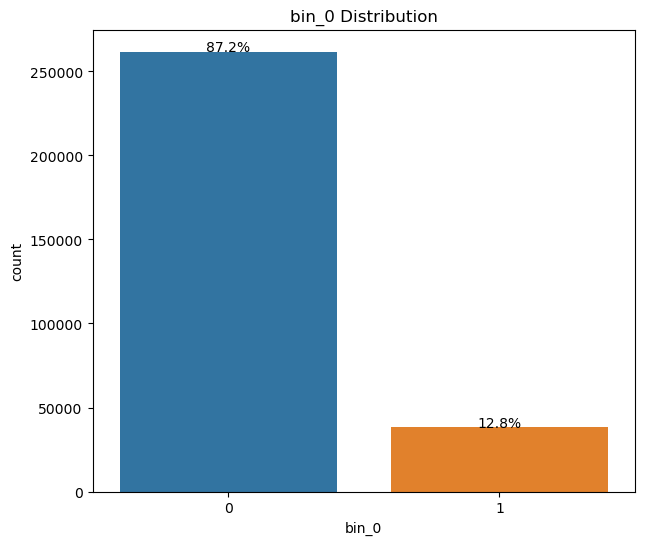

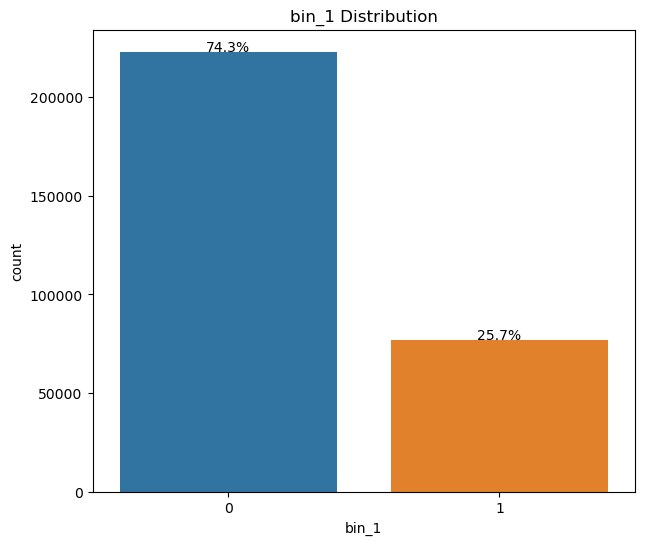

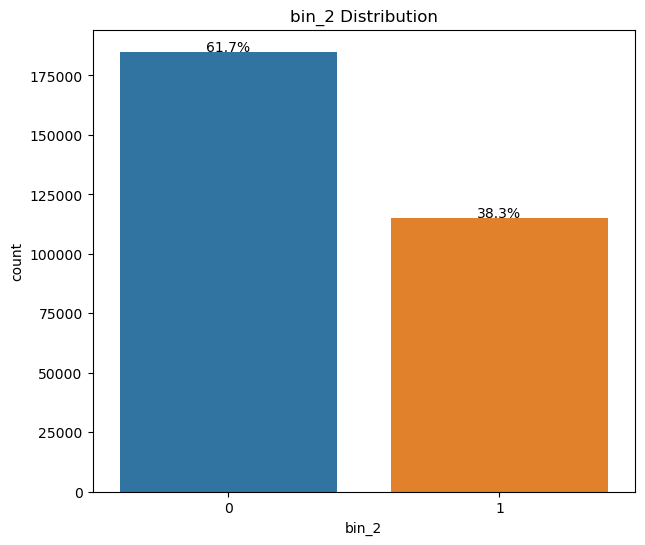

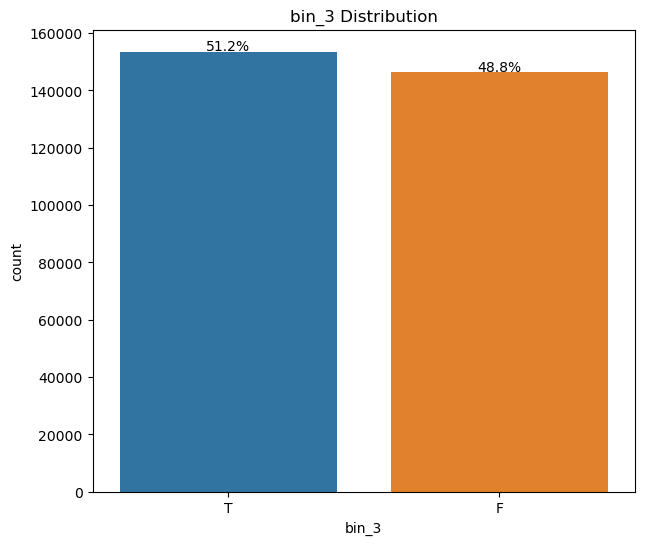

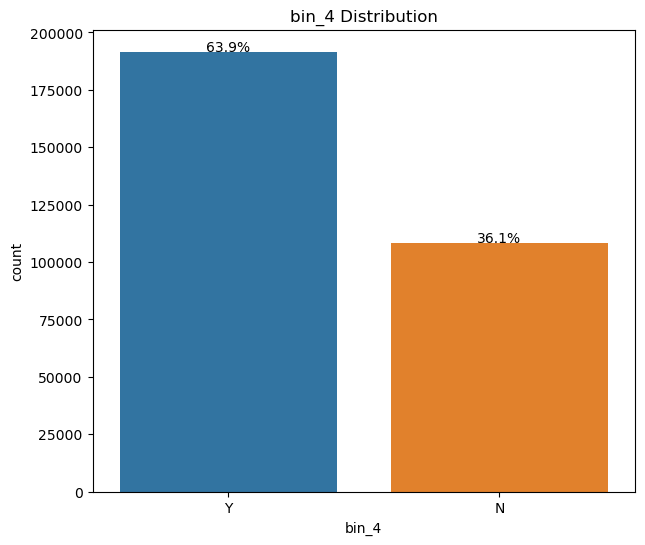

In [12]:
#이진형 분류(두가지 값으로 구분되는 자료)
for col in bin_col:
    plt.figure(figsize=(7, 6))
    ax = sns.countplot(x=col, data=train)
    write_percent(ax, len(train)) # 비율 표시
    ax.set_title(f'{col} Distribution');
    plt.show()

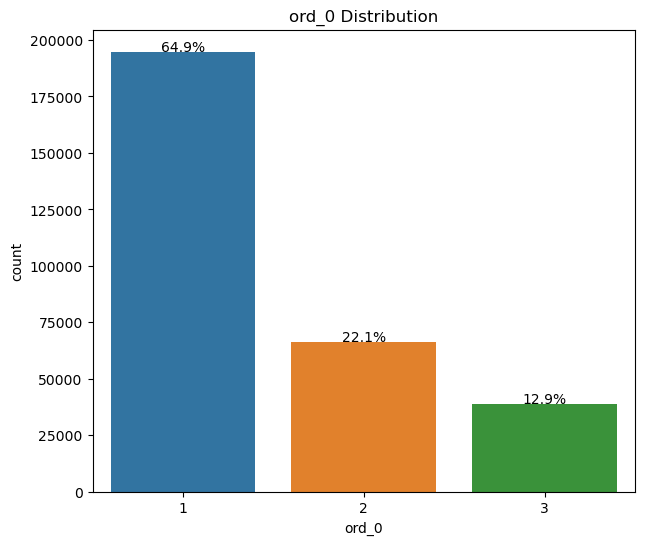

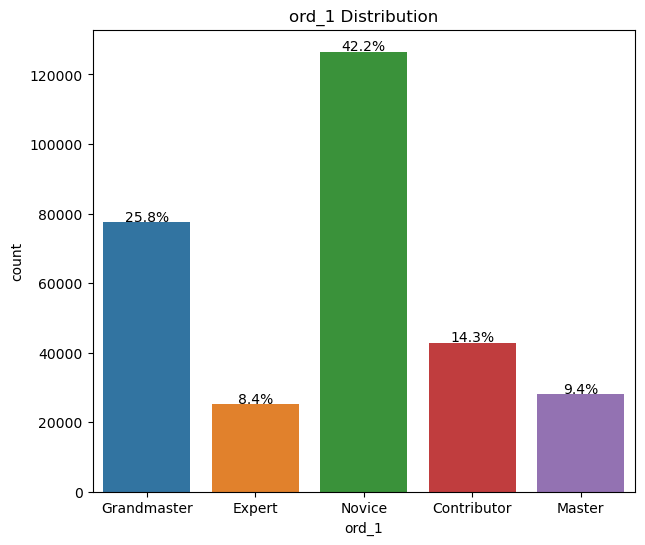

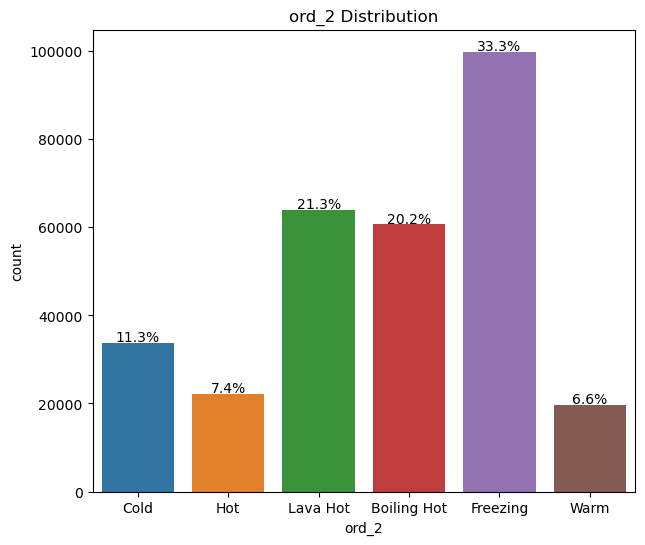

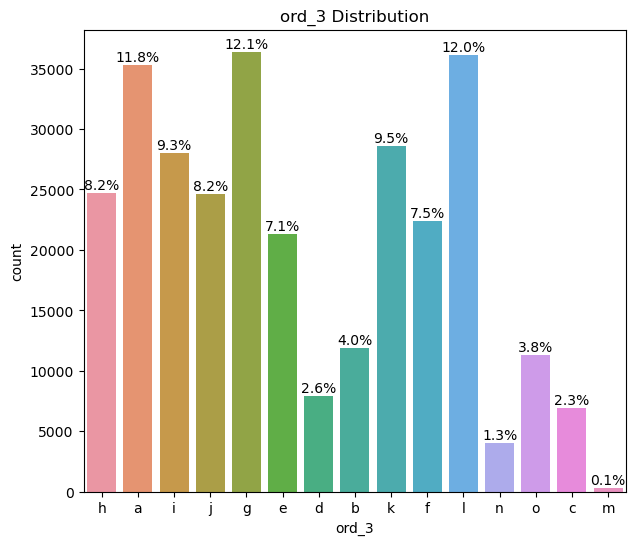

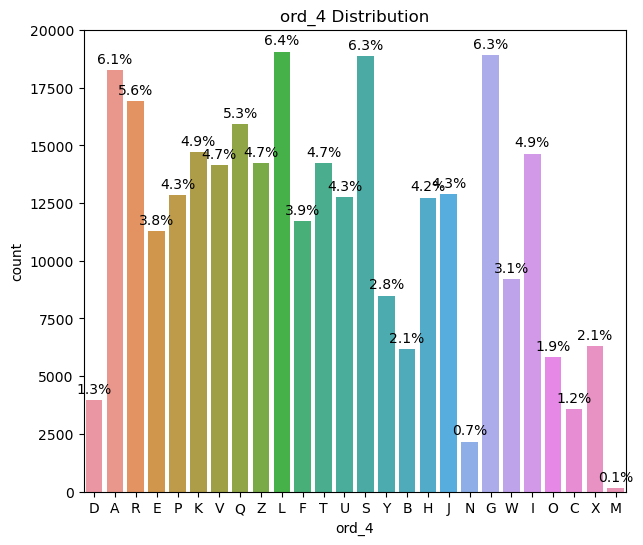

In [13]:
#순서형 분류(분류된 순서가 의미가 있음)
for col in ord_col:
    plt.figure(figsize=(7, 6))
    ax = sns.countplot(x=col, data=train)
    write_percent(ax, len(train)) # 비율 표시
    ax.set_title(f'{col} Distribution');
    plt.show()

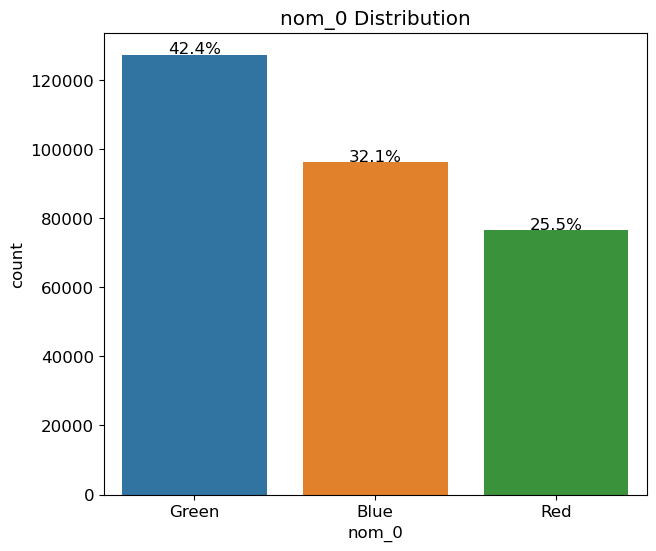

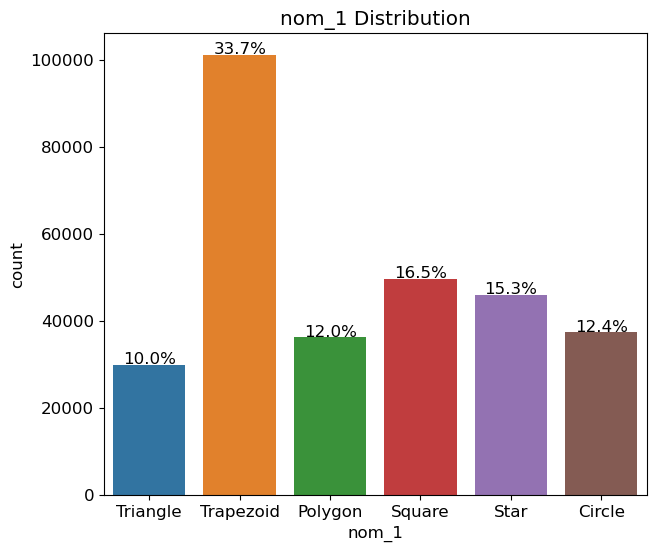

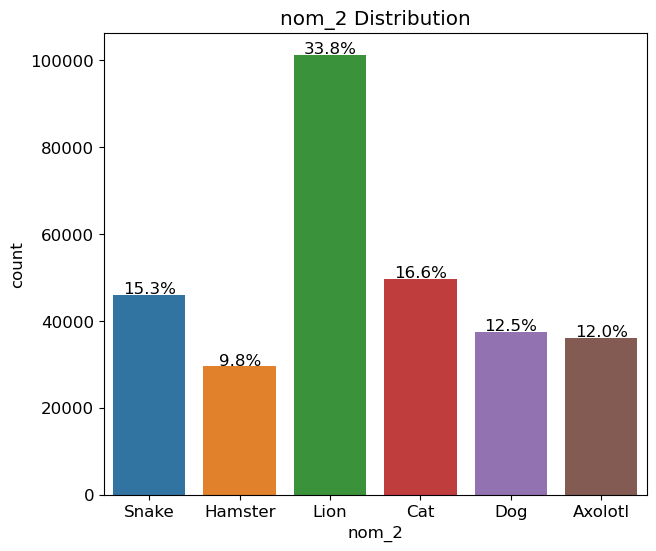

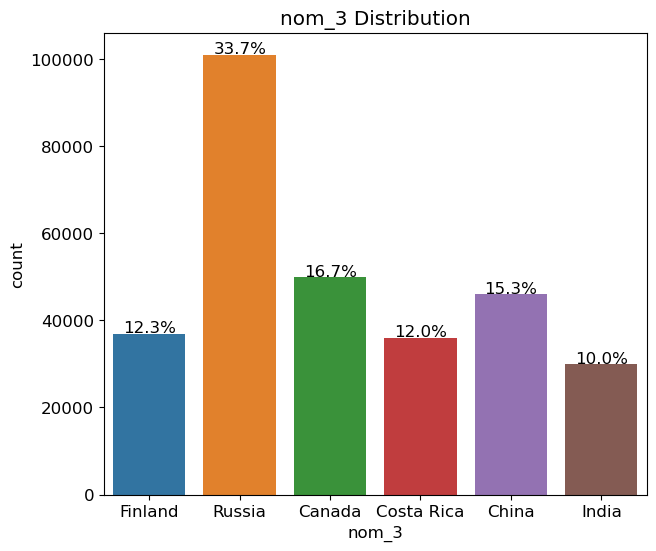

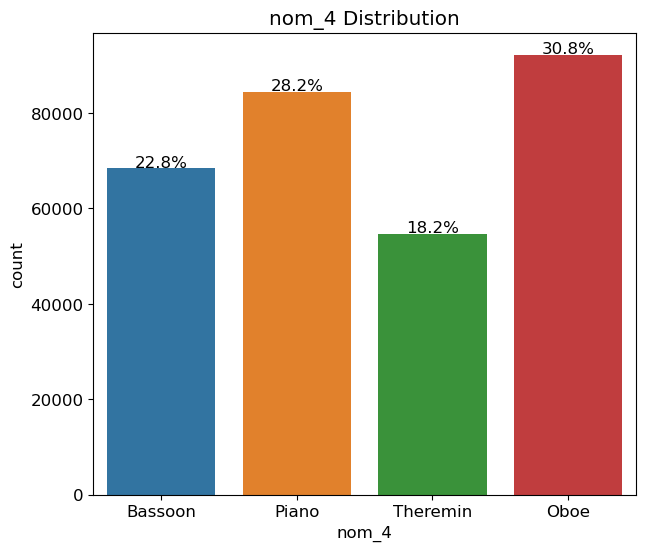

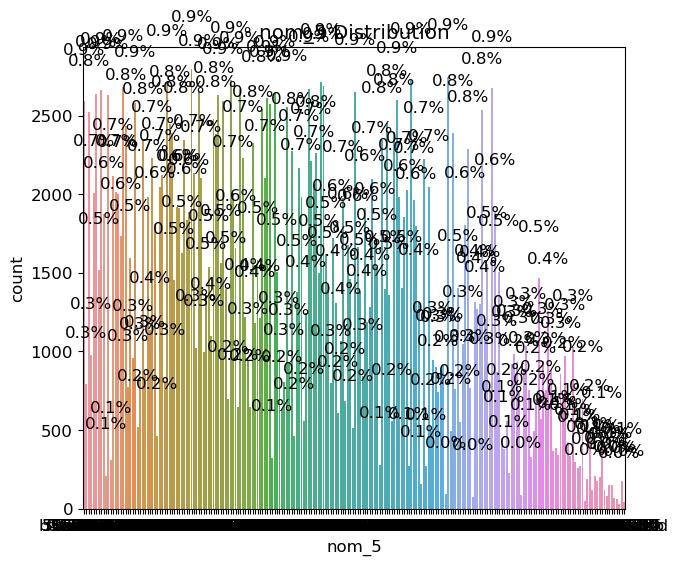

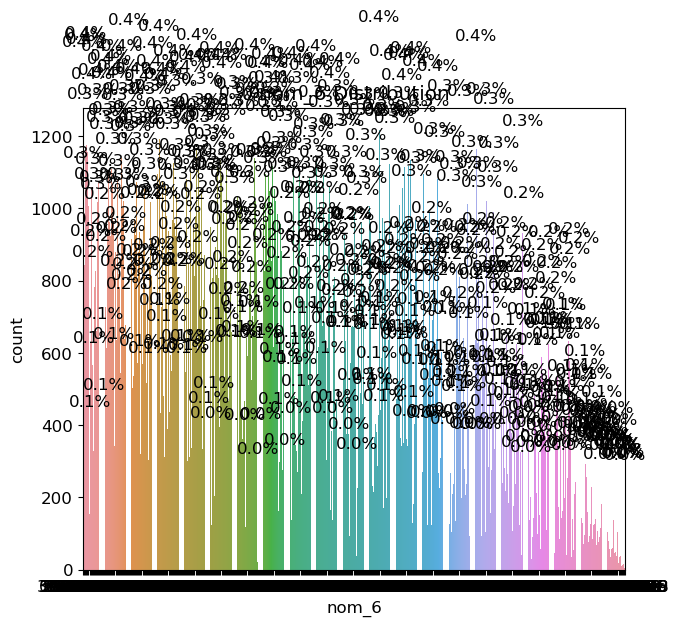

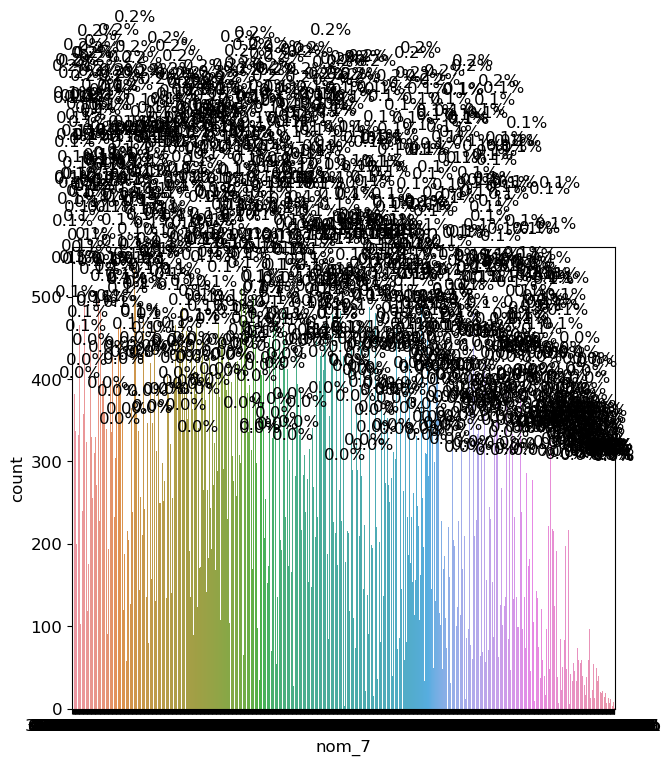

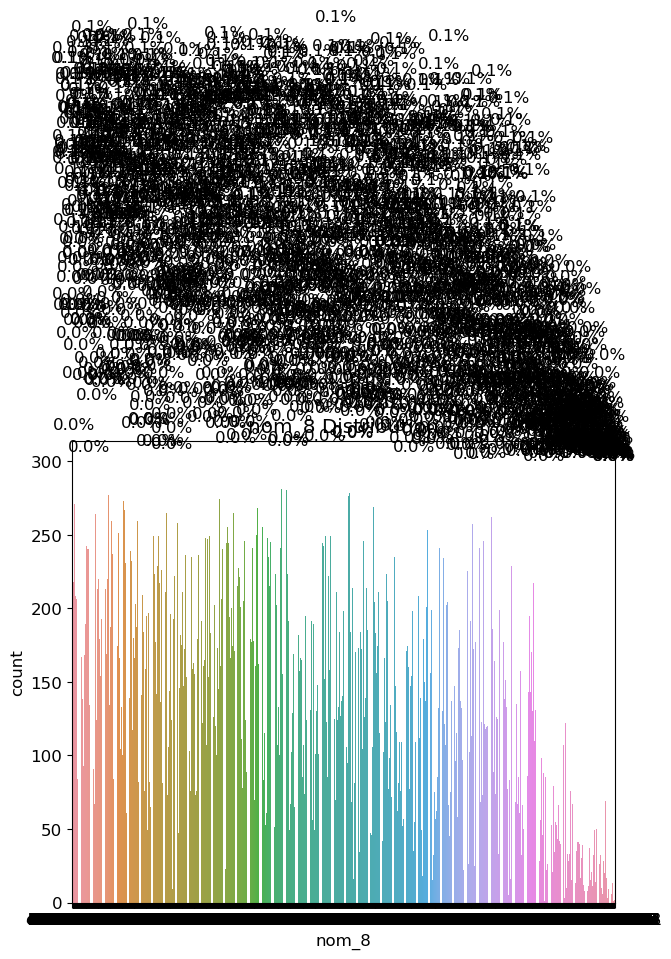

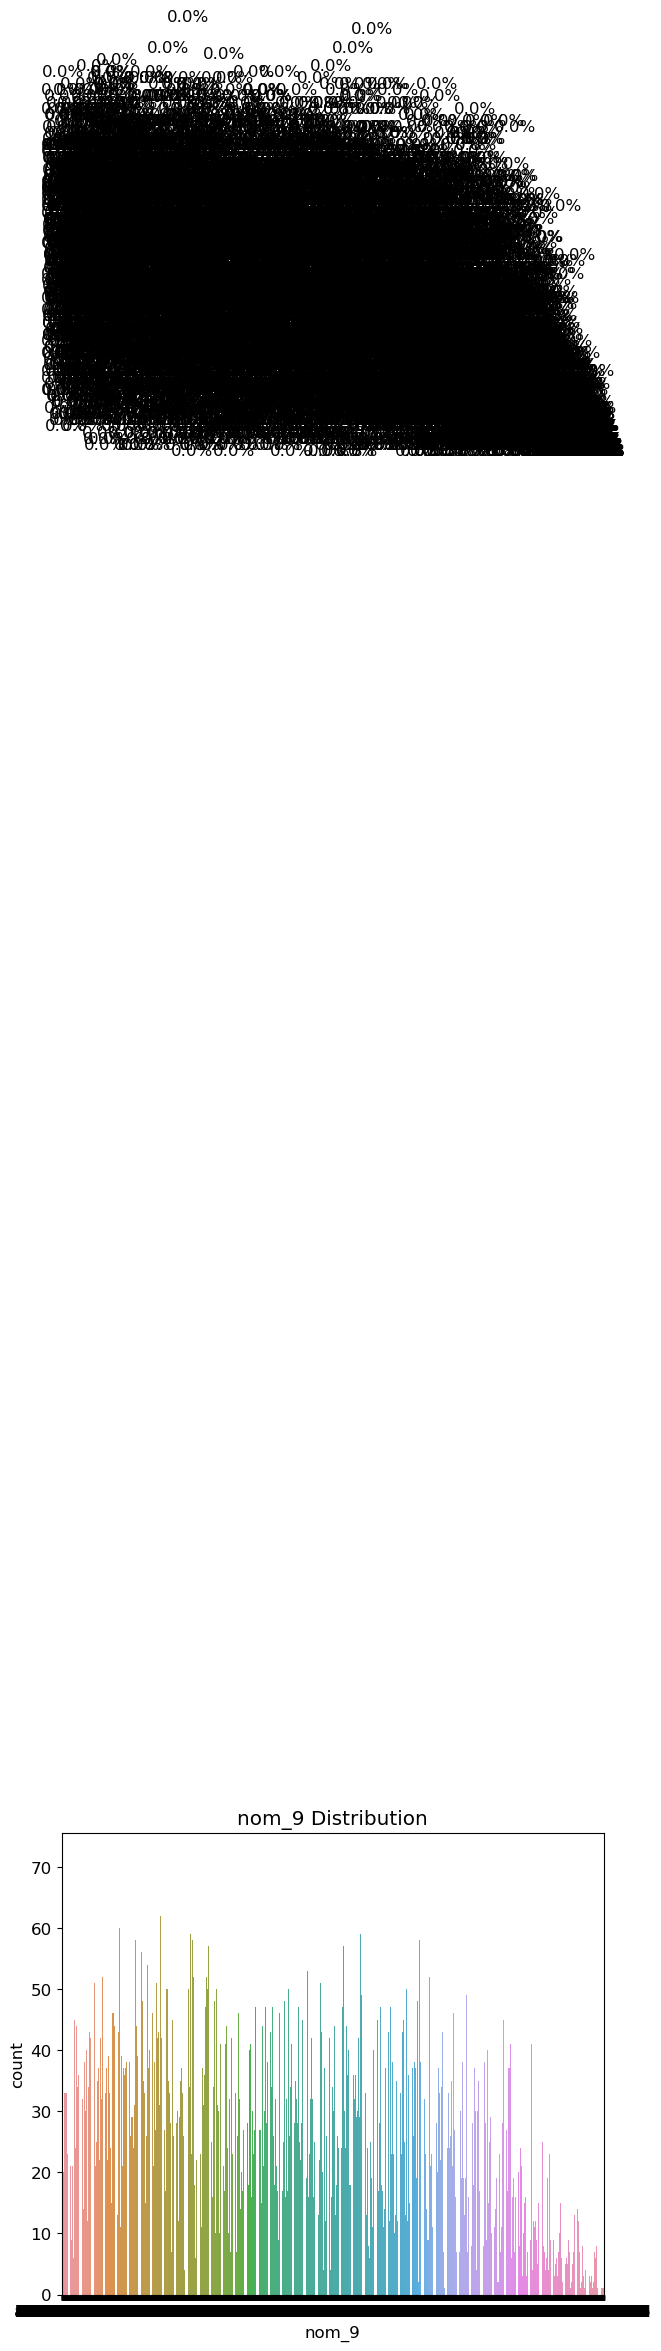

In [38]:
#명목형 분류(단순히 표기를 위한 분류,순서가 없다)
for col in nom_col:
    plt.figure(figsize=(7, 6))
    ax = sns.countplot(x=col, data=train)
    write_percent(ax, len(train)) # 비율 표시
    ax.set_title(f'{col} Distribution');
    plt.show()

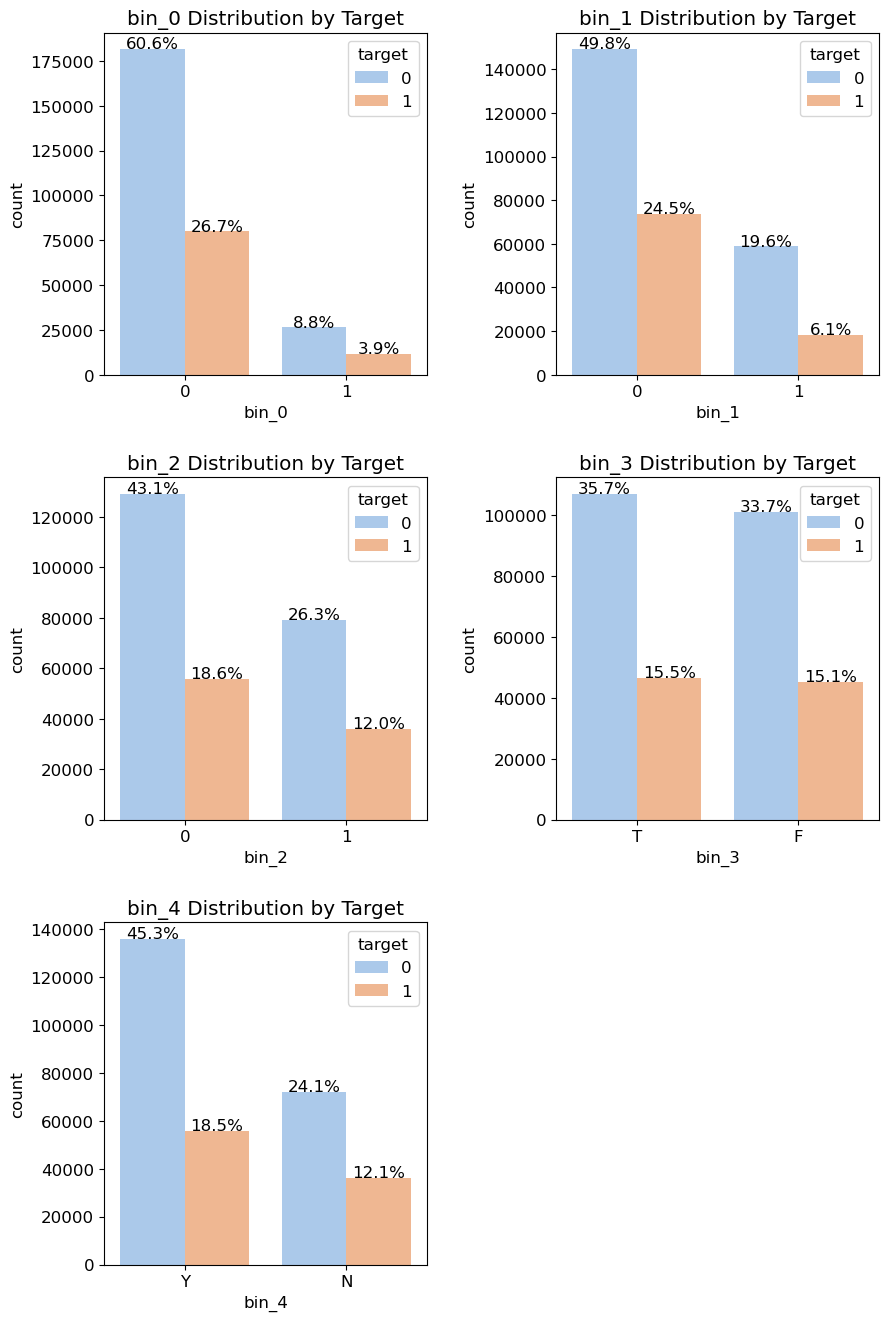

In [15]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] # 피처 목록

for idx, feature in enumerate(bin_features): 
    ax = plt.subplot(grid[idx]) 
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)
    
    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train))                     # 비율 표시

#명목형 피처분포

In [24]:
# 교차분석표 함수코드
# 정규화 후 비율을 백분율로 표현
# 각 행의 합이 100프로가 되게 인덱스를 기준으로 정규화
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [26]:
bin0_crosstab=get_crosstab(train,'bin_0')

In [27]:
bin0_crosstab

target,bin_0,0,1
0,0,69.450504,30.549496
1,1,69.148519,30.851481


In [28]:
bin0_crosstab[1]

0    30.549496
1    30.851481
Name: 1, dtype: float64

In [47]:
#포인트플롯 생성 함수
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values, # 포인트플롯 순서
                        color='black',                  # 포인트플롯 색상
                        )                   # 범례 미표시
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

In [48]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, 
                                  size=(15, 20)):
    plt.figure(figsize=size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백 설정
    
    for idx, feature in enumerate(features): 
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) # 비율 표시
        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

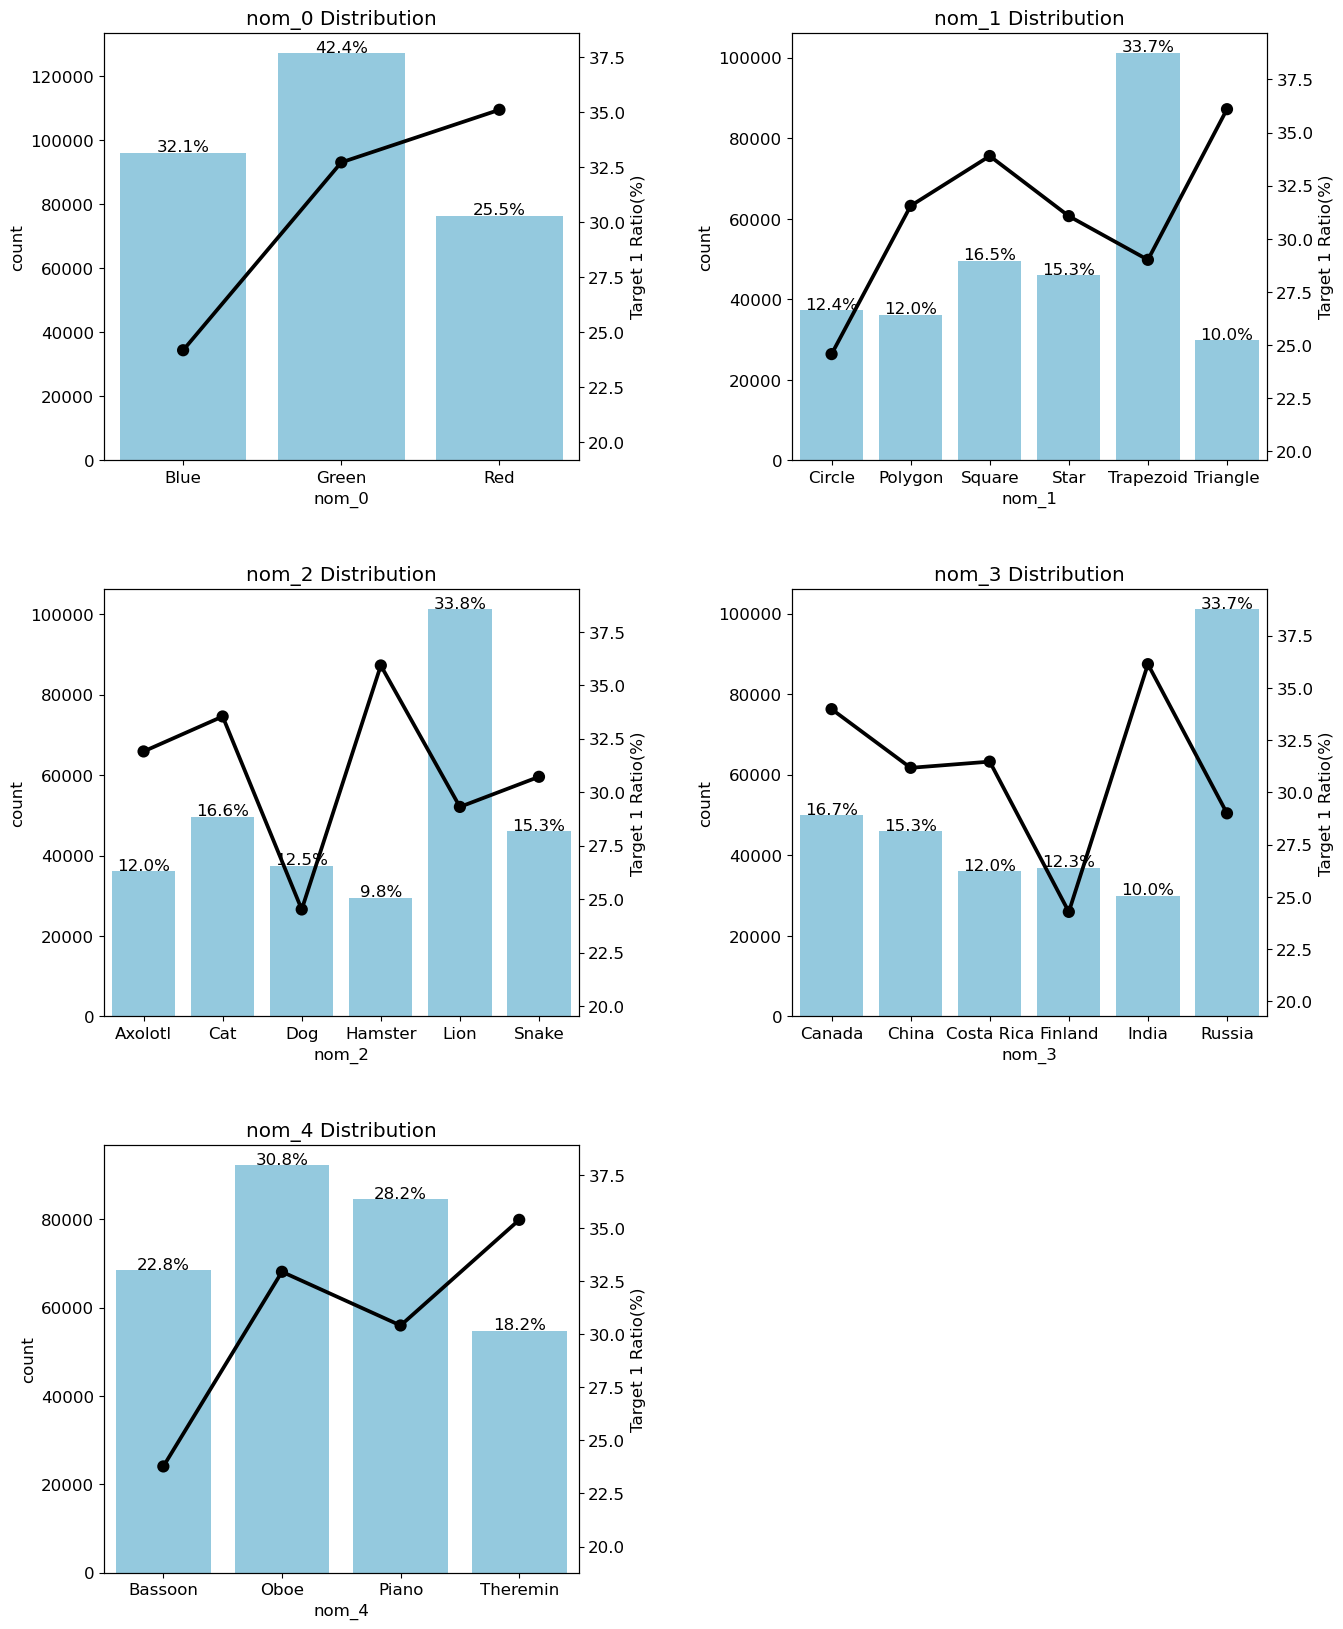

In [49]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] # 명목형 피처
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

In [51]:
from pandas.api.types import CategoricalDtype 
#순서형자료 순서정렬
ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

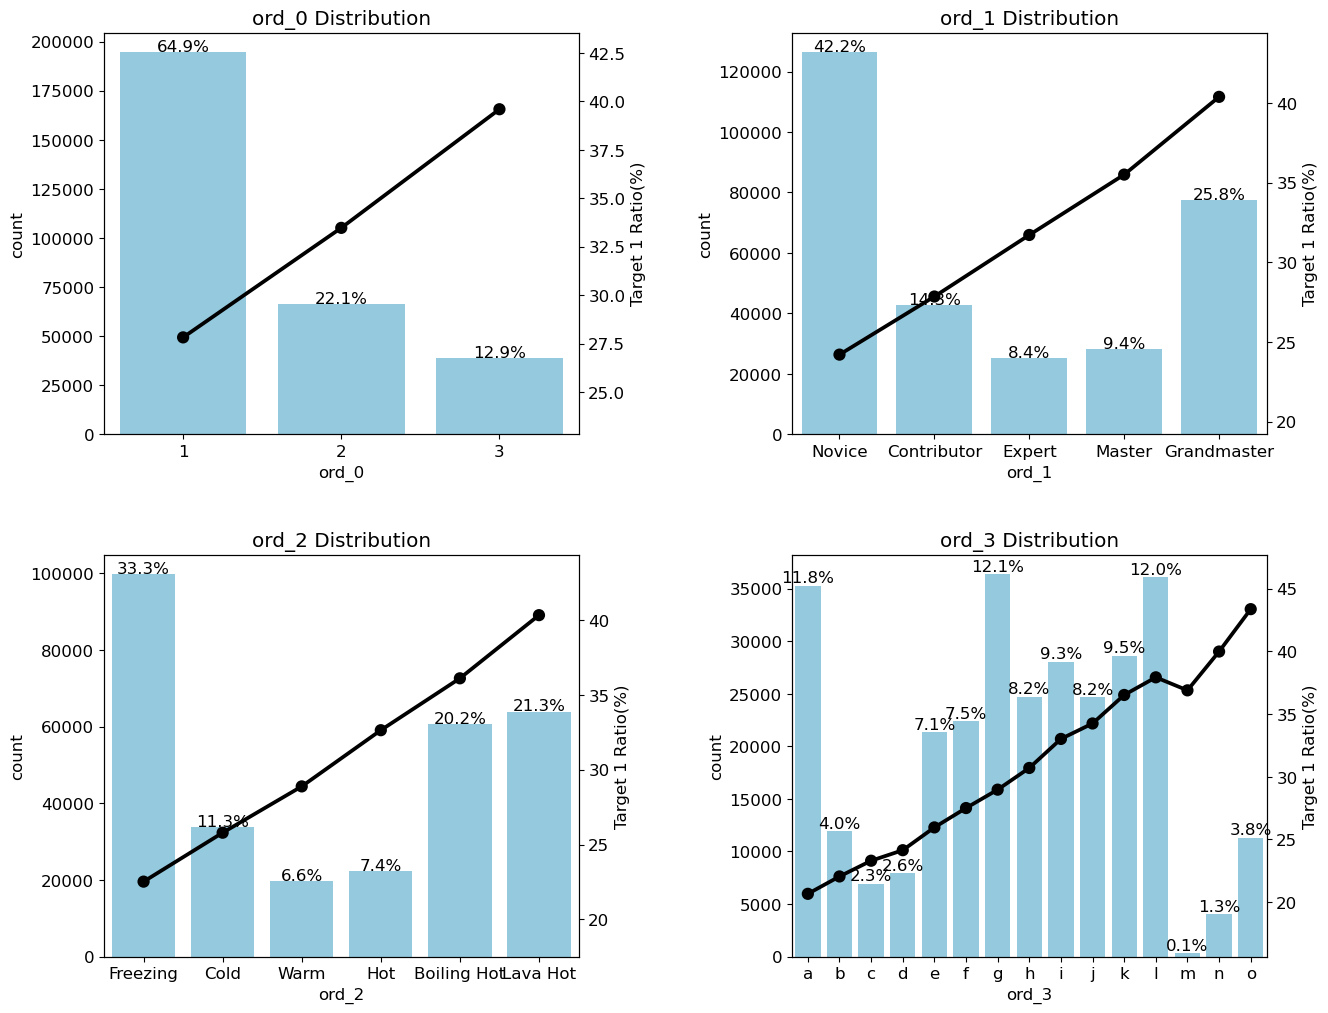

In [52]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

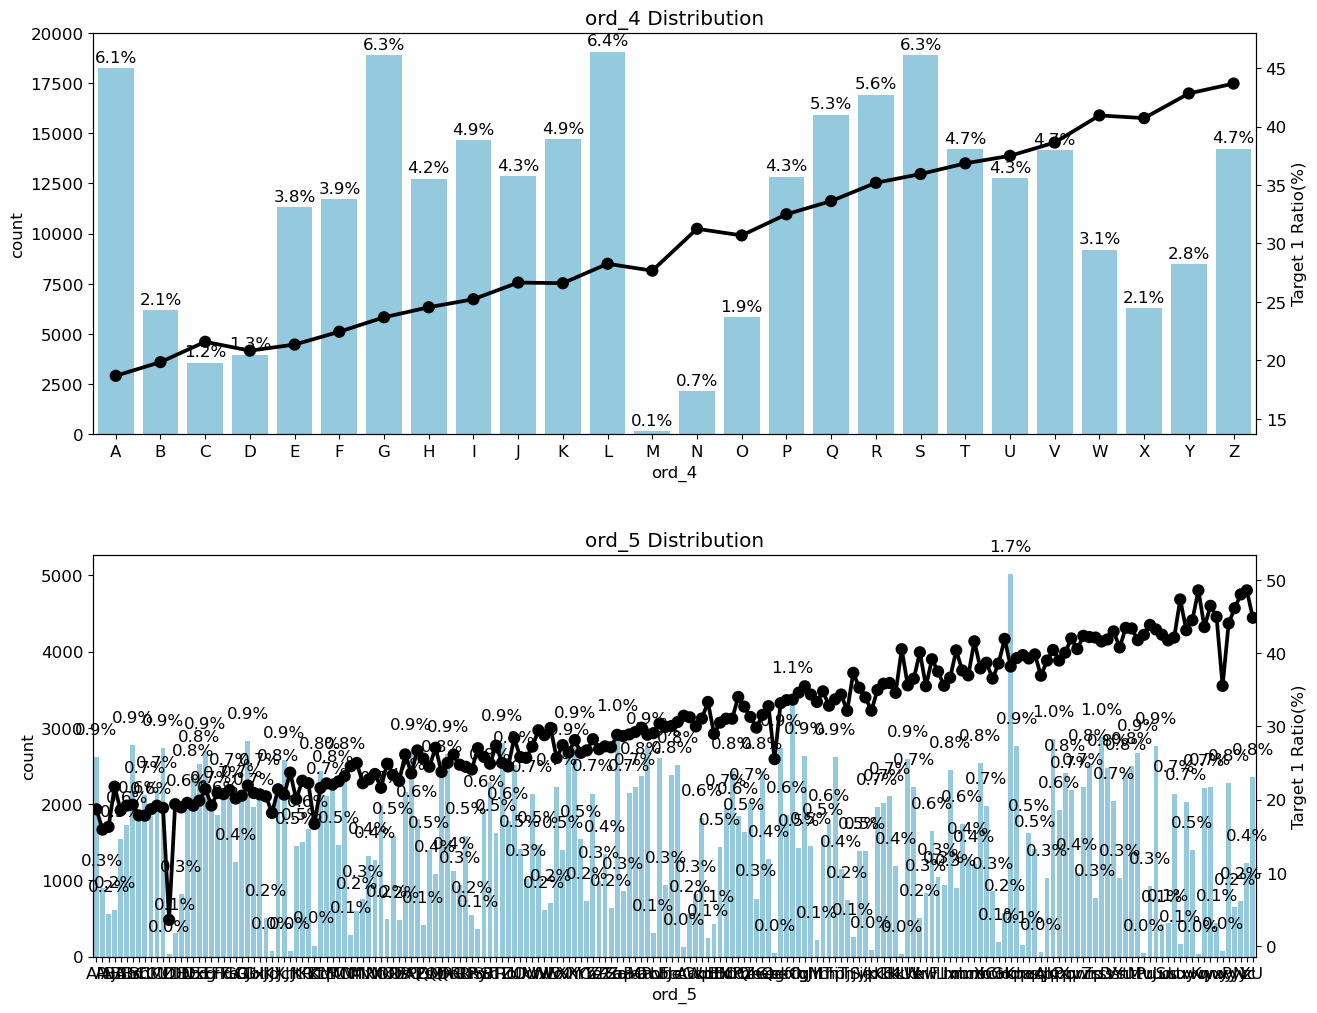

In [53]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], 
                              num_rows=2, num_cols=1, size=(15, 12))

#순서형 피처는 뒤로 갈수록 타겟값이 1인 비율이 올라간다는 것을 알수있다..!

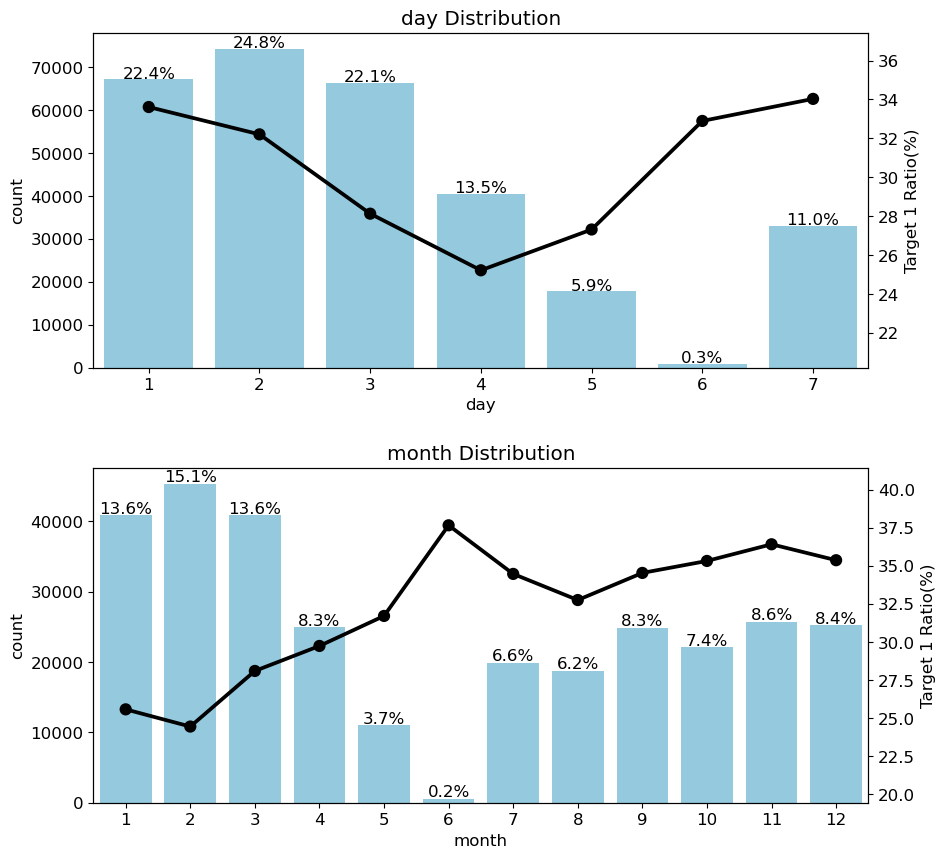

In [55]:
#날짜형 피처 분포
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, 
                              num_rows=2, num_cols=1, size=(10, 10))

In [1]:
train = pd.read_csv('train_7.csv')
test= pd.read_csv('test_7.csv')

NameError: name 'pd' is not defined

In [ ]:
all_data = pd.concat([train, test]) # 훈련 데이터와 테스트 데이터 합치기 
all_data = all_data.drop('target', axis=1) # 타깃값 제거
all_data

In [68]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성
all_data_encoded = encoder.fit_transform(all_data) # 원-핫 인코딩 적용

In [69]:
#train=pd.get_dummies(data=train) -- 메모리 부족으로 안됌.

In [70]:
all_data_encoded

<500000x516552 sparse matrix of type '<class 'numpy.float64'>'
	with 12000000 stored elements in Compressed Sparse Row format>

In [71]:
num_train = len(train) # 훈련 데이터 개수
y = train['target']
# 훈련 데이터와 테스트 데이터 나누기
train = all_data_encoded[:num_train] # 0 ~ num_train - 1행
test = all_data_encoded[num_train:] # num_train ~ 마지막 행


In [73]:
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(train, y,
                                                      test_size=0.1,
                                                      stratify=y,
                                                      random_state=10)

In [74]:
X_train

<270000x516552 sparse matrix of type '<class 'numpy.float64'>'
	with 6480000 stored elements in Compressed Sparse Row format>

In [75]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42) # 모델 생성
logistic_model.fit(X_train, y_train) # 모델 훈련

LogisticRegression(max_iter=1000, random_state=42)

In [76]:
#0과 1인 확률
logistic_model.predict_proba(X_test)

array([[0.23077311, 0.76922689],
       [0.91584429, 0.08415571],
       [0.8424174 , 0.1575826 ],
       ...,
       [0.25273129, 0.74726871],
       [0.50716982, 0.49283018],
       [0.95770267, 0.04229733]])

In [77]:
#0.5를 기준으로 1,0,을 예측하는것을 볼수 있음
logistic_model.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [78]:
y_test_preds = logistic_model.predict_proba(X_test)[:, 1]

In [79]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_test, y_test_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.7976


In [80]:
# 타깃값 1일 확률 예측
y_preds = logistic_model.predict_proba(test)[:, 1]

#성능개선

In [35]:
train = pd.read_csv('train_7.csv')
test= pd.read_csv('test_7.csv')

In [36]:
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis=1)
all_data = all_data.drop('id', axis=1)

In [37]:
#이진형 자료 숫자로 변환
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

In [38]:
#순서형 자료 숫자로 변환 --순서가 의미가 있으니깐 
ord1dict = {'Novice':0, 'Contributor':1, 
            'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2, 
            'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

In [39]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder() # OrdinalEncoder 객체 생성
# ordinal 인코딩 적용
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

# 피처별 인코딩 순서 출력
for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

In [40]:
nom_features = ['nom_' + str(i) for i in range(10)] # 명목형 피처

In [41]:
from sklearn.preprocessing import OneHotEncoder
#명목형 인코딩
onehot_encoder = OneHotEncoder() # OneHotEncoder 객체 생성
# 원-핫 인코딩 적용
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [42]:
all_data = all_data.drop(nom_features, axis=1) # 기존 명목형 피처 삭제

In [43]:
#날짜형 인코딩
date_features  = ['day', 'month'] # 날짜 피처

# 원-핫 인코딩 적용
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

all_data = all_data.drop(date_features, axis=1) # 기존 날짜 피처 삭제

encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.preprocessing import MinMaxScaler
#순서형 피처 스케일링
ord_features = ['ord_' + str(i) for i in range(6)] # 순서형 피처
# min-max 정규화
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

In [32]:
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,0.5,1.00,0.2,0.500000,0.12,0.712042,2,2
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,0.0,1.00,0.6,0.000000,0.00,0.486911,7,8
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,0.0,0.50,1.0,0.500000,0.68,0.162304,7,2
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,0.0,1.00,0.8,0.571429,0.12,0.701571,2,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,0.0,1.00,0.0,0.000000,0.68,0.827225,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0,0,0,0,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,0.0,0.00,1.0,0.642857,0.00,0.130890,1,3
199996,1,0,0,0,1,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,0.0,0.25,1.0,0.357143,0.72,0.089005,2,2
199997,0,1,1,1,1,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,0.0,0.00,0.8,0.428571,0.84,0.345550,3,1
199998,1,0,0,1,1,Blue,Star,Hamster,Costa Rica,Bassoon,...,606ac930b,d4cf587dd,0.5,1.00,0.8,0.428571,0.92,0.429319,2,1


In [45]:
from scipy import sparse

# 인코딩 및 스케일링된 피처 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                               encoded_nom_matrix,
                               encoded_date_matrix],
                              format='csr')

In [46]:
all_data_sprs

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

In [47]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_sprs[:num_train] # 0 ~ num_train - 1행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['target']

In [48]:
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                      test_size=0.1,
                                                      stratify=y,
                                                      random_state=10)

In [49]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()

# 하이퍼파라미터 값 목록
lr_params = {'C':[0.1, 0.125, 0.2], 'max_iter':[800, 900, 1000], 
             'solver':['liblinear'], 'random_state':[42]}

# 그리드서치 객체 생성
gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                         param_grid=lr_params,
                                         scoring='roc_auc', # 평가지표
                                         cv=5)
# 그리드서치 수행
gridsearch_logistic_model.fit(X_train, y_train)

print('최적 하이퍼파라미터:', gridsearch_logistic_model.best_params_)

최적 하이퍼파라미터: {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}
CPU times: total: 21min 11s
Wall time: 3min 32s


In [50]:
y_valid_preds = gridsearch_logistic_model.predict_proba(X_valid)[:, 1]


In [51]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.8045


In [52]:
# 타깃값 1일 확률 예측
y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:,1]

In [53]:
y_preds

array([0.34510514, 0.69514079, 0.11203298, ..., 0.33287431, 0.57254384,
       0.20042292])